In [2]:
 import pandas as pd
 import numpy as np

In [3]:
 df = pd.read_csv('data.csv', encoding='cp1252')

<ipython-input-3-cd4933a65337>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='cp1252')


In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
 df=df.drop_duplicates()
 df.isna().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149466
type,5357
so2,34632
no2,16222
rspm,40035
spm,236908


In [ ]:
df=df.drop(['stn_code', 'agency','sampling_date','location_monitoring_station','pm2_5'], axis = 1)
df.head()


,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [26]:
 col_var = ['state', 'location', 'type','date']
 col_num = ['so2','no2','rspm','spm']
 for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())
 df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
date,0


In [9]:
subSet1 = df[['state', 'type']]
subSet2 = df[['state','location']]
subSet1.head()
subSet2.head()

,state,location
0,Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,Hyderabad
3,Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Hyderabad


In [10]:
 concatenated_df = pd.concat([subSet1, subSet2], axis=1)
 concatenated_df

,state,type,state,location
0,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
3,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
...,...,...,...,...
435737,West Bengal,RIRUO,West Bengal,ULUBERIA
435738,West Bengal,RIRUO,West Bengal,ULUBERIA
435739,andaman-and-nicobar-islands,"Residential, Rural and other Areas",andaman-and-nicobar-islands,Guwahati
435740,Lakshadweep,"Residential, Rural and other Areas",Lakshadweep,Guwahati


In [11]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 +
threshold)
    return column[~outlier_mask]
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [12]:
 col_name = ['so2', 'no2', 'rspm', 'spm']
 for col in col_name:
    df[col] = remove_outliers(df[col])


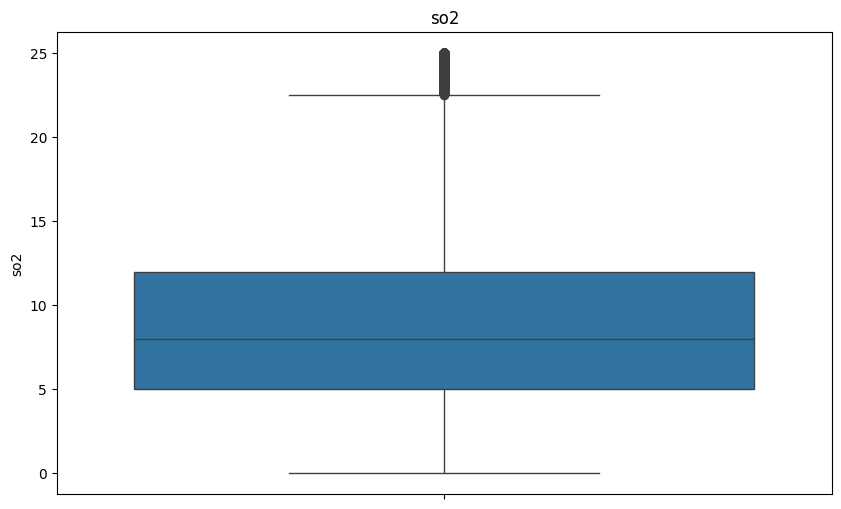

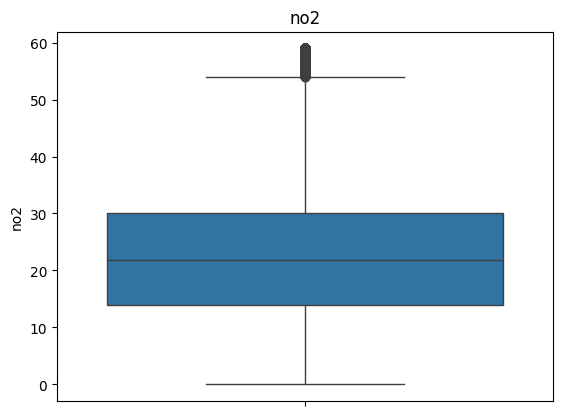

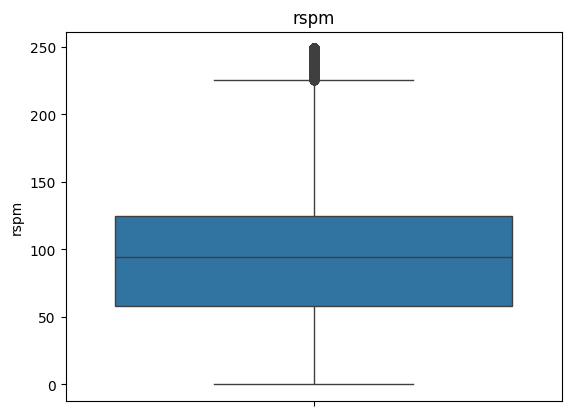

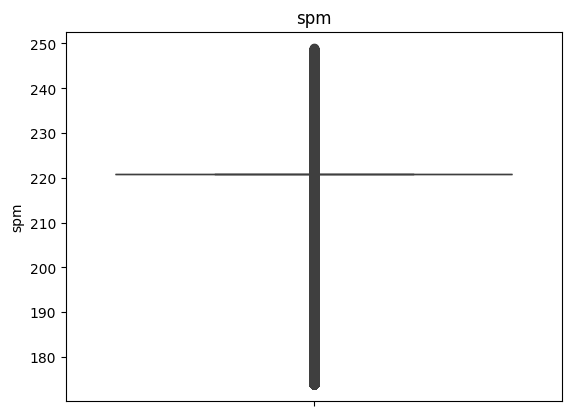

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Adjust the figure size if needed
for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()



In [14]:
from sklearn.preprocessing import LabelEncoder
col_label= ['state','location','type']
# Initialize LabelEncoder
encoder = LabelEncoder()
 # Iterate over columns
for col in col_label:
        # Fit and transform the column
        df[col] = encoder.fit_transform(df[col])
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,0,114,Maharashtra State Pollution Control Board,6,4.800000,17.400000,108.871711,220.774796,Regional Office,40.791467,1990-02-01
1,151.0,February - M021990,0,114,Maharashtra State Pollution Control Board,1,3.100000,7.000000,108.871711,220.774796,Regional Office,40.791467,1990-02-01
2,152.0,February - M021990,0,114,Maharashtra State Pollution Control Board,6,6.200000,28.500000,108.871711,220.774796,Regional Office,40.791467,1990-02-01
3,150.0,March - M031990,0,114,Maharashtra State Pollution Control Board,6,6.300000,14.700000,108.871711,220.774796,Regional Office,40.791467,1990-03-01
4,151.0,March - M031990,0,114,Maharashtra State Pollution Control Board,1,4.700000,7.500000,108.871711,220.774796,Regional Office,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,35,282,West Bengal State Pollution Control Board,3,22.000000,50.000000,143.000000,220.774796,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,35,282,West Bengal State Pollution Control Board,3,20.000000,46.000000,171.000000,220.774796,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,193.0,19-03-15,36,100,Maharashtra State Pollution Control Board,6,10.830468,25.823296,108.871711,220.774796,Regional Office,40.791467,2015-03-19
435740,193.0,19-03-15,17,100,Maharashtra State Pollution Control Board,6,10.830468,25.823296,108.871711,220.774796,Regional Office,40.791467,2015-03-19


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [24]:
df = df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station', 'pm2_5'], axis=1)


In [27]:
X = df.drop('so2', axis=1)   # 'so2' is the target variable
y = df['so2']

# -----------------------
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=6, shuffle=True)

# -----------------------
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# -----------------------
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# -----------------------
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"\n{name} Model:")
    print(f" R² Score     : {r2:.4f}")
    print(f" MAE          : {mae:.4f}")
    print(f" MSE          : {mse:.4f}")
    print(f" Accuracy (%) : {r2*100:.2f}%")

# -----------------------
# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree Regressor", y_test, dt_pred)


Linear Regression Model:
 R² Score     : 0.0207
 MAE          : 4.0646
 MSE          : 26.8480
 Accuracy (%) : 2.07%

Decision Tree Regressor Model:
 R² Score     : 0.5884
 MAE          : 1.7089
 MSE          : 11.2848
 Accuracy (%) : 58.84%
